# Jupyter Notebook
## Fundamentals of Data Analyses Project 2019

### Importing of Python Modules

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sbn

### Regression Total Bill and Tip Amount

The code below creates a pair plot that compares the numerical variables within the tips dataset and is quite useful to get a high level summary picture of how the data looks visually, code adapted from lecture on descriptive statistics. 

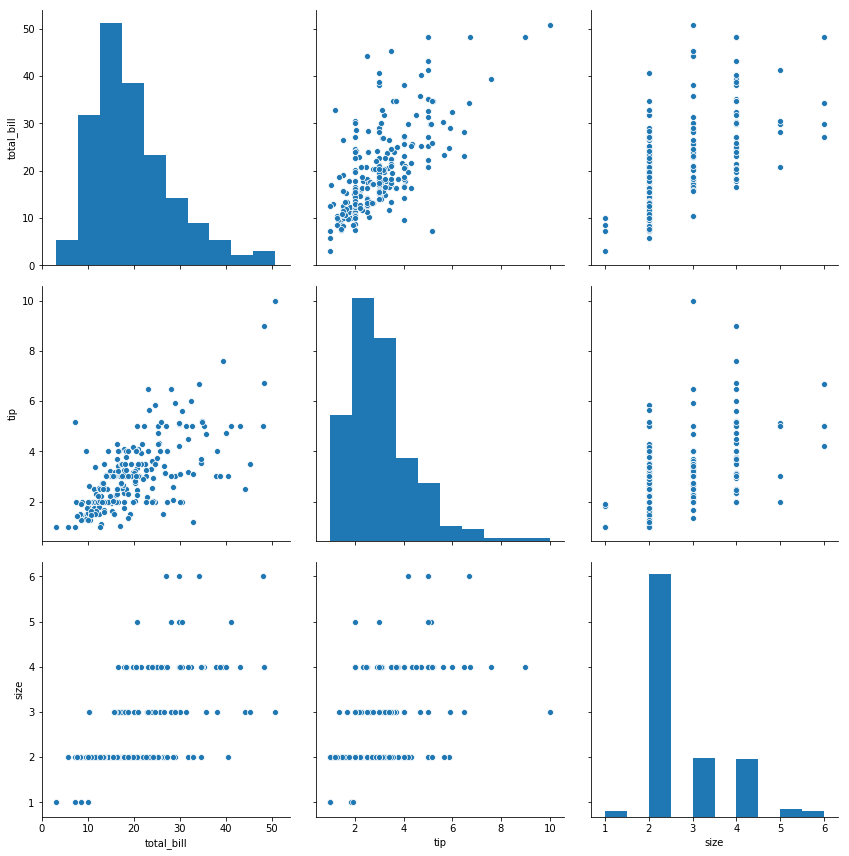

In [2]:
df = pd.read_csv (r'Resources/tips.csv')

sbn.pairplot(df, height=4)
plt.savefig('Resources/Pair_Plot.png')
plt.show()

From the pair plot summary above the scatterplot comparing total bill and tip appeared to show a relationship between the two variables, because as the total bill increases so to does the tip indicating a linear relationship.

The scatterplot was then plotted again on it's own with a regression line fitted to the points as can be seen below. The regression line further supports the linear relationship assumption between the total bill and tip amount.

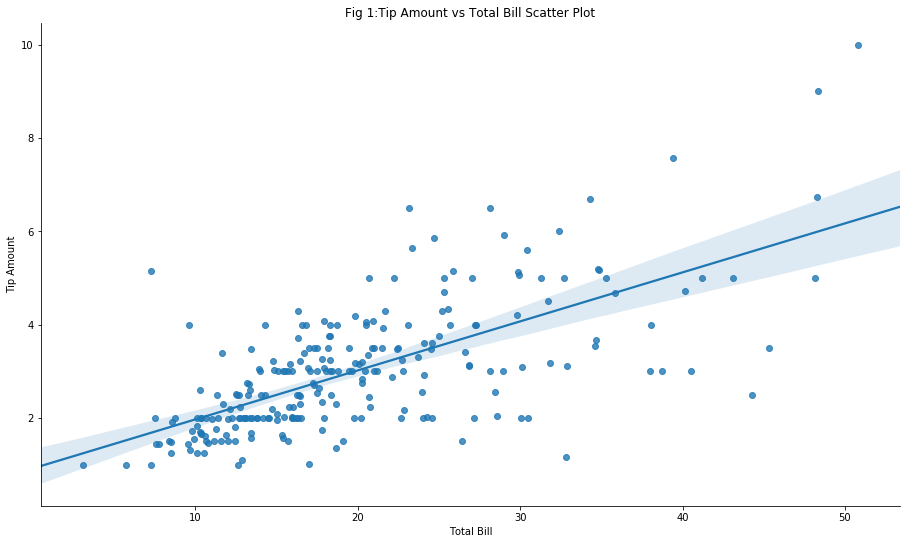

In [3]:
g = sbn.lmplot( x='total_bill', y='tip', data=df, fit_reg=True, height=7.5, aspect=1.7)

plt.title('Fig 1:Tip Amount vs Total Bill Scatter Plot')
plt.xlabel('Total Bill')
plt.ylabel('Tip Amount')

plt.savefig('Resources/Tip_vs_Bill_Scatter.png')
plt.show()

### Party Size Analysis

Below Histogram displays the distribution of customers based on the party size to determine the most common party size that frequented the restaurant during the data gathering period. Code adapted from [here](https://datatofish.com/use-pandas-to-calculate-stats-from-an-imported-csv-file/) to read in data using pandas and from [here](http://python-graph-gallery.com/histogram/) to generate seaborn plot. 

Size of plot adjusted using code from [here](https://www.mikulskibartosz.name/how-to-change-plot-size-in-jupyter-notebook/), styling of plot area code adapted from [here](https://seaborn.pydata.org/tutorial/aesthetics.html).

In [4]:
font = {'weight' : 'bold',
        'size'   : 14}

plt.rc('font', **font)

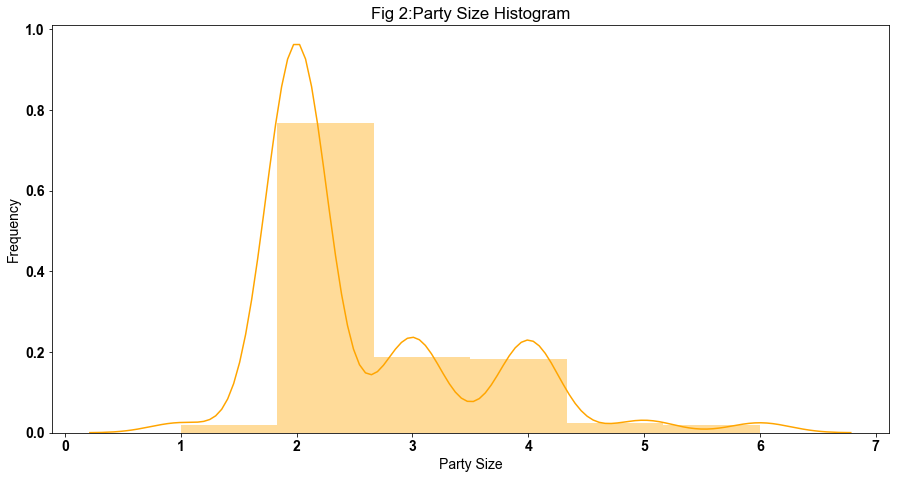

In [5]:
plt.rcParams["figure.figsize"] = (15,7.5)

sbn.distplot(df["size"], color='orange',  bins=6)
sbn.set_style("darkgrid")
plt.title('Fig 2:Party Size Histogram')
plt.xlabel('Party Size')
plt.ylabel('Frequency')
plt.savefig('Resources/Party_Size_Histogram.png')
plt.show()

The above histogram shows that the majority of customers attending the restaurant came in a party of 2, this would introduce a bias into the analysis into a possible relationship between party size and tip amount as the data is not normally distributed in the shape of a bell curve.

 Percentage calculation adapted from [here](https://stackoverflow.com/questions/50558458/pandas-percentage-by-value-in-a-column).

In [6]:
df['size'].value_counts(normalize=True)*100

2    63.934426
3    15.573770
4    15.163934
5     2.049180
6     1.639344
1     1.639344
Name: size, dtype: float64

html code below aligns table to left, code adapted from [here](https://stackoverflow.com/questions/21892570/ipython-notebook-align-table-to-the-left-of-cell).

In [7]:
%%html
<style>
table {float:left}
</style>

Table 2 below further supports the histogram in Fig 3 in that an analysis of any relationship between party size and the amount of tip would be biased as the majority of the data points (64%) occured in a party size of 2.

**Table 2: % Occurence of Party Size**

|**Party Size**|**% of Total**|
|:-----:|:-----:|
|1|1.64%|
|2|63.93%|
|3|15.57%|
|4|15.16%|
|5|2.05%|
|6|1.64%|
|**Total**|**100%**|

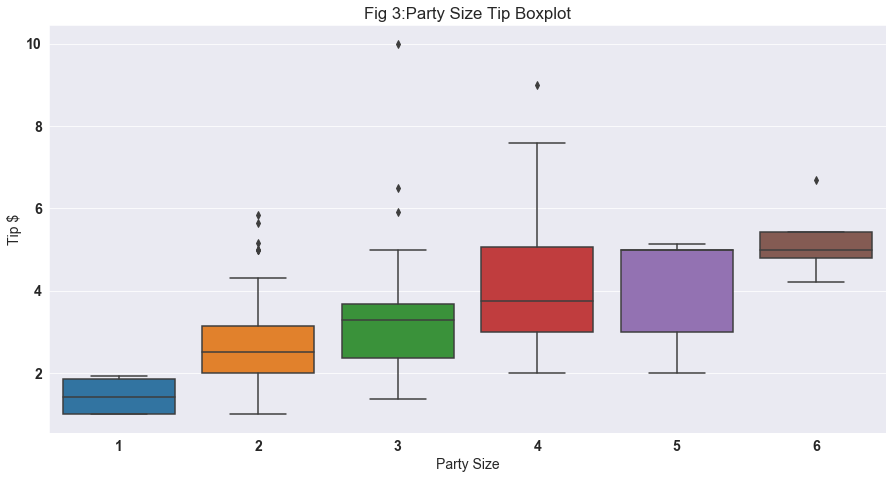

In [8]:
sbn.boxplot(x = "size", y = "tip", data = df)

sbn.set_style("darkgrid")
plt.title('Fig 3:Party Size Tip Boxplot')
plt.xlabel('Party Size')
plt.ylabel('Tip $')
plt.savefig('Resources/Party_Size_Tip_Boxplot.png')
plt.show()

Again after doing some further research and contemplating on what I had done up to this point I thought it would be a good idea to return back to the party size variable and look at the dataset more in the light of a server and the amount of tip rather than what I had previously done on the tip percentage.

This line of thought resulted in the above boxplot that looks at the amount of tip and how the party size affects the tip that is received. As expected as the party size increases more food is being bought to feed the customers which results in a larger total bill and in turn as I have previously eluded to a higher tip as generally the tip amount is a percentage of the total bill typically in the region of 10%-15% of the total bill.

I did however find it interesting that the tip amount of the party sizes of 4 and 5 were pretty much identical so it appear that the party size of 5 tables did not in fact tip what I would have expected them to as I would have expected a difference in tip between 4 and 5 individuals in the party.

Below code will add additional column to dataframe containing tip.csv that calculates the % of tip vs the total bill which will be used to do further analysis on relationships of variables and tip amount.

In [9]:
df['tip_perc'] = ((df['tip']/df['total_bill'])*100)

### Gender Analysis

The first 2 lines of the below code creates 2 new dataframes to create a histogram comparing tip % between male and female customers, code adapted from [here](https://pythonspot.com/pandas-filter/).

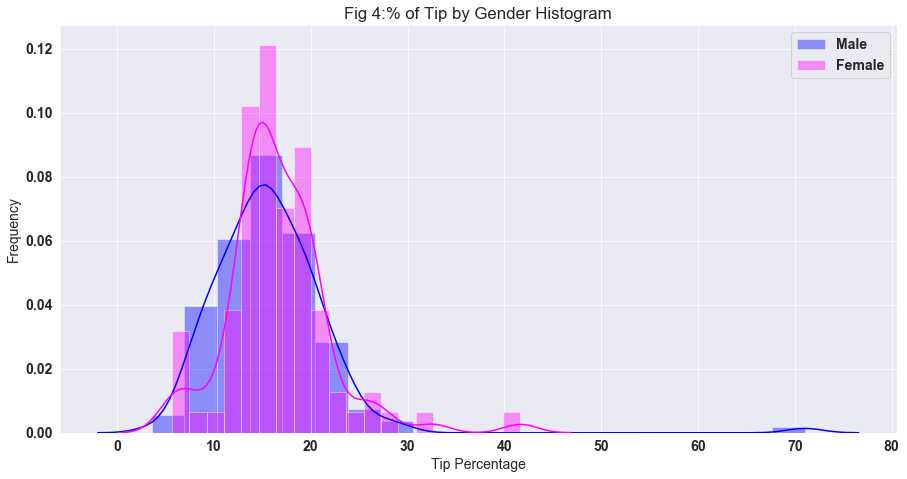

In [10]:
df_male = df[df.sex == 'Male']
df_female = df[df.sex == 'Female']

sbn.distplot(df_male.tip_perc, color='blue',label='Male',bins=20)
sbn.distplot(df_female.tip_perc, color='magenta',label='Female', bins=20)

plt.title('Fig 4:% of Tip by Gender Histogram')
plt.xlabel('Tip Percentage')
plt.ylabel('Frequency')

plt.legend()
plt.savefig('Resources/Gender_Tip_Perc_Histogram.png')
plt.show()

The plot above shows a histogram of the % of tip per transaction broken out by gender. 


From this plot it can be determined that the distribution of the % of tip is reasonably distributed in both genders, however it appears that **females** have a much tighter spread around the average % tip and a higher proportion of individuals tipping at the average by looking at the shape of the curve vs the males as the **females** curve is both taller and narrower.


This suggests that the **females** are more consistenly tipping at the average tip than the males with less variance.

The below descriptive statistics summary of males and females further supports the above plot analysing whether a relationship lies between tip % amount and gender. This code was adapted from a recent lecture that used pandas as a method of displaying descriptive statistics on a dataset.

**Males Pandas Describe Function**

Save dataframe to csv file code adapted from [here](https://stackoverflow.com/questions/48158688/save-pandas-describe-for-human-readibility/48158748).

In [11]:
# Save table to CSV
df_male.describe().to_csv("Resources/df_male_describe.csv")

# Code adapted from recent lecture on using pandas for Descriptive Statistics
df_male.describe()

,total_bill,tip,size,tip_perc
count,157.000000,157.000000,157.000000,157.000000
mean,20.744076,3.089618,2.630573,15.765055
std,9.246469,1.489102,0.955997,6.477787
min,7.250000,1.000000,1.000000,3.563814
25%,14.000000,2.000000,2.000000,12.138869
50%,18.350000,3.000000,2.000000,15.349194
75%,24.710000,3.760000,3.000000,18.623962
max,50.810000,10.000000,6.000000,71.034483


The above descriptive statistics summary gives a great summary of how the numerical variables stack up for the male related data within the dataset with the below descriptive summary representing the female population. 

I believe the more accurate way to determine whether a relationship exists between tip amount and gender is by looking at the % of tip compared against the total bill amount. To this affect the female population tip % was always ahead of the males, in that the mean, first quartile, second quartile and third quartile tip % was always higher for the female population as can be seen in the above and below pandas describe functions.

What this demonstrates is that the female population are tipping a higher % of tip than the males, this information can be quite valuable to management of the restaurant in ensuring that the tips are better distributed amongst the staff so if any of the staff are falling behind some of the others in the amount of tips they are receiving they can be assigned more female customers to bring there tips in line with the other staff members.

Furthermore the smaller standard deviation for the female population relating to the % tip and the tip amount supports that the femlaes have a smaller variance between the different tip amounts indicating higher consistency in there tipping.

**Females Pandas Describe Function**

In [12]:
# Save table to CSV
df_female.describe().to_csv("Resources/df_female_describe.csv")

# Code adapted from recent lecture on using pandas for Descriptive Statistics
df_female.describe()

,total_bill,tip,size,tip_perc
count,87.000000,87.000000,87.000000,87.000000
mean,18.056897,2.833448,2.459770,16.649074
std,8.009209,1.159495,0.937644,5.363173
min,3.070000,1.000000,1.000000,5.643341
25%,12.750000,2.000000,2.000000,14.041645
50%,16.400000,2.750000,2.000000,15.558149
75%,21.520000,3.500000,3.000000,19.426621
max,44.300000,6.500000,6.000000,41.666667


Code for boxplot adapted from [here](https://data-and-design.readthedocs.io/en/latest/02-introPandas.html). 

Looking at how the analysis of the dataset was completed in this link got me thinking although the tip percentage is an important factor for servers to increase there tips they need to also be considering which of the genders had a larger bill as this would lead to larger tips.

As although it looks like the females are tipping larger percentages, it appears that the males have a larger total bill represented by the below box chart as the male plot is higher up than the females and so this would offset the difference in tip percentage.

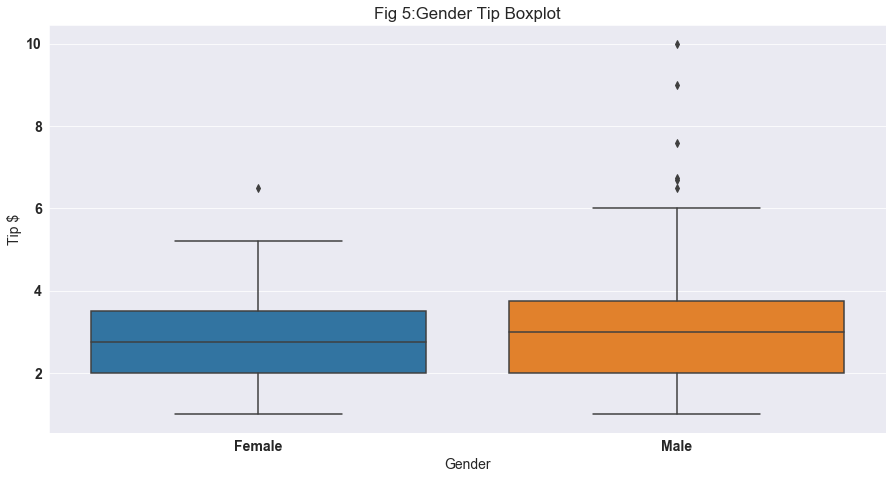

In [13]:
sbn.boxplot(x = "sex",y = "tip", data = df )

sbn.set_style("darkgrid")
plt.title('Fig 5:Gender Tip Boxplot')
plt.xlabel('Gender')
plt.ylabel('Tip $')
plt.savefig('Resources/Gender_Tip_Boxplot.png')
plt.show()

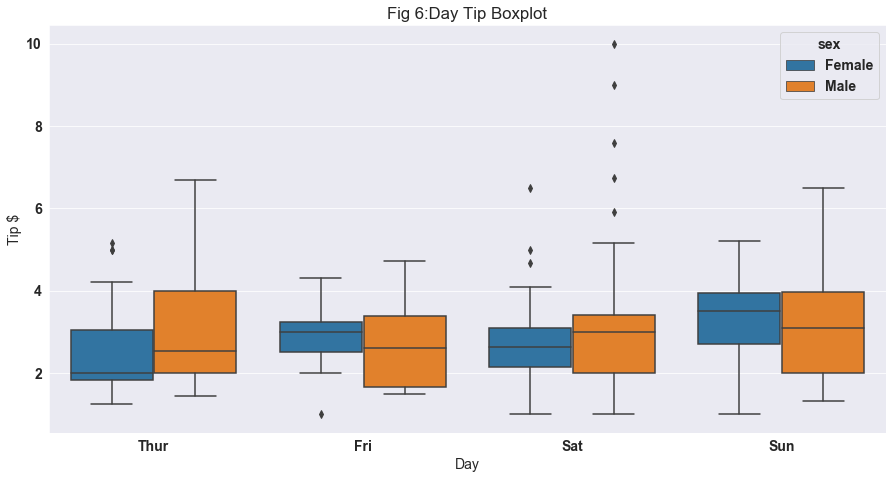

In [14]:
sbn.boxplot(x = "day", y = "tip", hue = "sex", data = df, order=["Thur", "Fri", "Sat", "Sun"])

sbn.set_style("darkgrid")
plt.title('Fig 6:Day Tip Boxplot')
plt.xlabel('Day')
plt.ylabel('Tip $')
plt.savefig('Resources/Day_Tip_Boxplot.png')
plt.show()

From the previous boxplot analyising which of the 2 genders had the larger (males) which would in turn result in larger tips I then went on to analyse of the 2 genders on each day of service had the higher total bill amount again using a boxplot as can be seen in the boxplot above.

It appears that a Thursday service the males again had the higher bill and so would be the preffered customer for those staff members that are behind in the amount of tips that they are accumalating. Again this would be a key piece of information for management to note when trying best to evenly distribute these tips amongst staff.

Code to resize scatter plot image adapted from [here](https://stackoverflow.com/questions/35948995/seaborn-lmplot-got-an-unexpected-keyword-argument-figsize). Custom legends generated using code adapted from [here](https://stackoverflow.com/questions/53116532/modify-seaborn-line-relplot-legend-title).

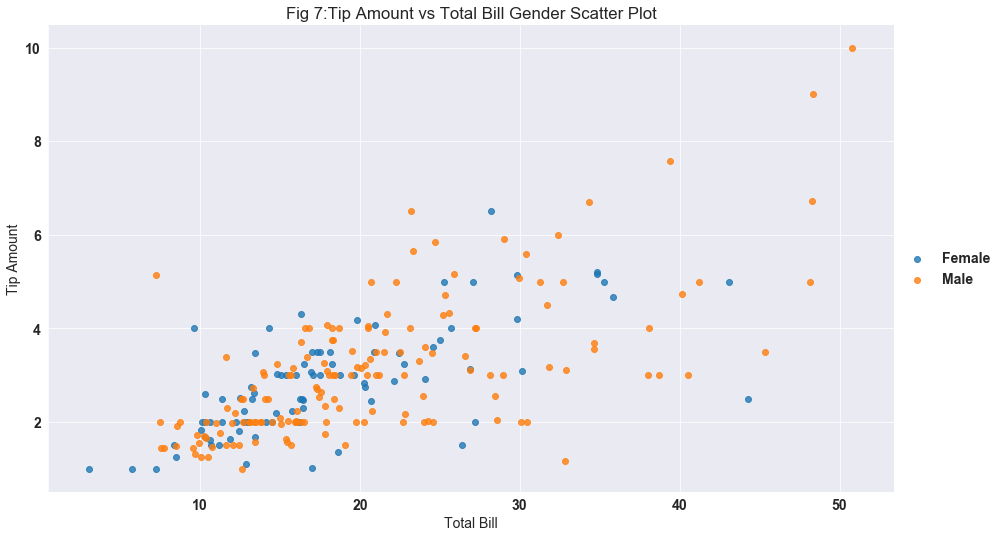

In [15]:
g = sbn.lmplot( x='total_bill', y='tip', data=df, fit_reg=False, hue='sex', legend=True, height=7.5, aspect=1.7)

plt.title('Fig 7:Tip Amount vs Total Bill Gender Scatter Plot')
plt.xlabel('Total Bill')
plt.ylabel('Tip Amount')

g._legend.set_title("")

plt.savefig('Resources/Gender_Tip_vs_Bill_Scatter.png')

plt.show()

The above scatter plot compares the Tip Amount with the Total bill. As expected the plot does not show much meaningful information as it was already expected that the amount of tip would increase in line with the total bill amount which would be common knowledge to the management of the company.

The plot also does not really lend itself to showing any relationship between gender and tip amount as the points of the plot are quite intermixed and is difficult to distinguish any preference towards one gender over the other.

### Smoking Preference Analysis

The first 2 lines of the below code creates 2 new dataframes to create a histogram comparing tip % between smoker and non-smoker customers, code adapted from [here](https://pythonspot.com/pandas-filter/).

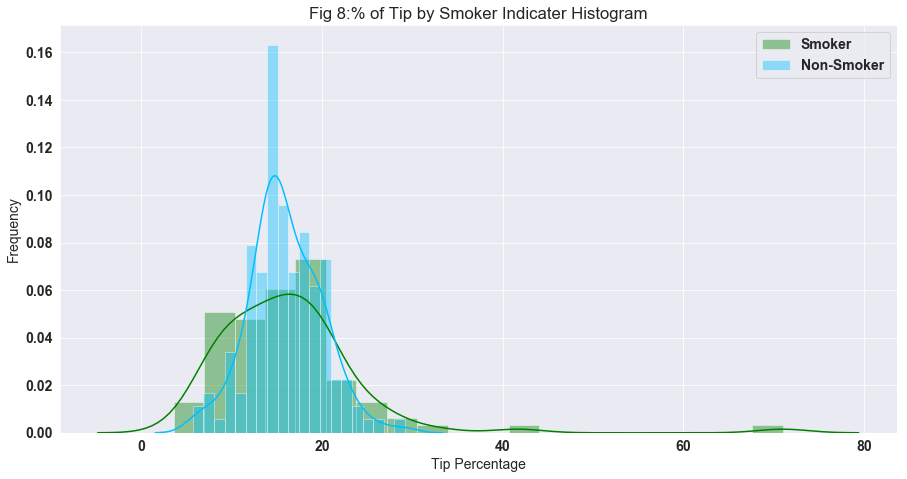

In [16]:
df_smoker = df[df.smoker == 'Yes']
df_non_smoker = df[df.smoker == 'No']

sbn.distplot(df_smoker.tip_perc, color='green',label='Smoker',bins=20)
sbn.distplot(df_non_smoker.tip_perc, color='deepskyblue',label='Non-Smoker', bins=20)

plt.title('Fig 8:% of Tip by Smoker Indicater Histogram')
plt.xlabel('Tip Percentage')
plt.ylabel('Frequency')

plt.legend()
plt.savefig('Resources/Smoker_Tip_Perc_Histogram.png')
plt.show()

The above histogram compares the % tip paid by both smokers and non-smokers.

Similarly to the comparison completed on gender, the data for both sets is reasonably normally distributed as can be seen in the bell shape of the KDE line indicating a gausian distribution.

Both the smokers and non-smokers have a similar mean tip %, however the **non-smokers** have a higher KDE peak which indicates that they are more frequently tipping at this amount and generally speaking from looking at the graph are also more often tiping more than the smokers.

Code below creates a reference dataframe that will allow creation for additional column in main Tips dataframe for better formatted plots adapted from class lectures and from [here](https://www.geeksforgeeks.org/different-ways-to-create-pandas-dataframe/).

In [17]:
smoker_ref = [['Yes','Smoker'],['No','Non-Smoker']]

df_smoker_ref = pd.DataFrame(smoker_ref, columns = ['ref', 'Type'])

Code below takes main Tips dataframe and adds data from df_smoker_ref dataframe to allow better formatting of graphs adapted from [here](https://stackoverflow.com/questions/37894807/lookup-values-with-different-column-names-in-pandas). 

In [18]:
d = df_smoker_ref.set_index('ref')['Type'].to_dict()
df['smoker_text'] = df.smoker.map(d)

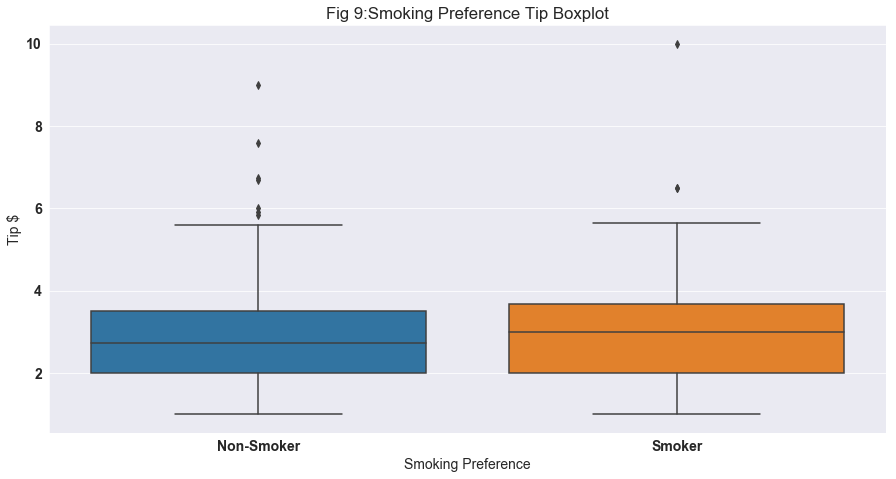

In [19]:
sbn.boxplot(x = "smoker_text",y = "tip", data = df )

sbn.set_style("darkgrid")
plt.title('Fig 9:Smoking Preference Tip Boxplot')
plt.xlabel('Smoking Preference')
plt.ylabel('Tip $')
plt.savefig('Resources/Smoking_Pref_Tip_Boxplot.png')
plt.show()

The above boxplot looks at any difference in the tip amount between smoking and non-smoking customers that attended the restaurant while data was being gathered. At first glance it does not look like there is any significant difference between smokers and non-smokers as a whole.

However when I dug a little deeper into the data and made the same comparison while also taking into consideration the time of service it showed that the lunch time service had more tips received from smoking customers that non-smoking customers.

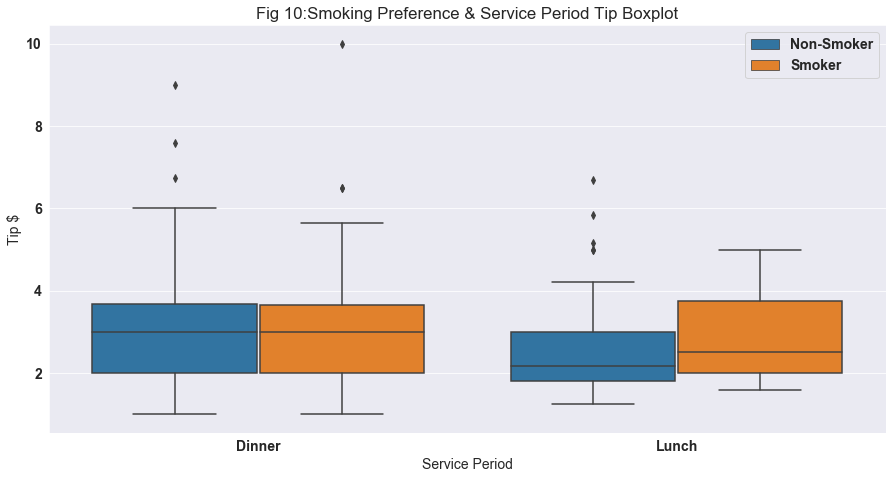

In [20]:
ax = sbn.boxplot(x = "time",y = "tip", data = df, hue='smoker_text' )

sbn.set_style("darkgrid")
plt.title('Fig 10:Smoking Preference & Service Period Tip Boxplot')
plt.xlabel('Service Period')
plt.ylabel('Tip $')

# Hide Legend Title
l = ax.legend()
l.set_title('')

plt.savefig('Resources/Smoking_Pref_Time_Tip_Boxplot.png')
plt.show()

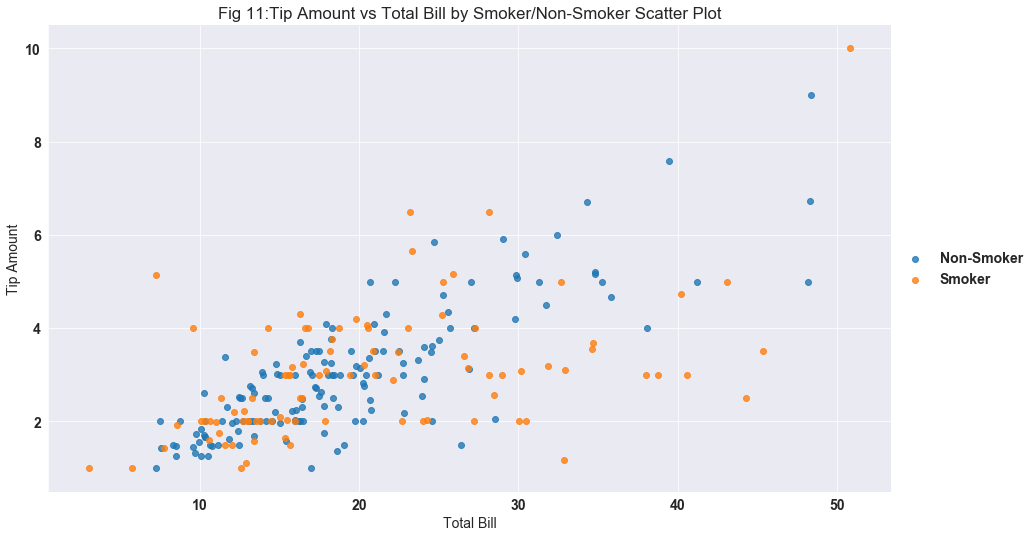

In [21]:
g = sbn.lmplot( x='total_bill', y='tip', data=df, fit_reg=False, hue='smoker_text', legend=True, height=7.5, aspect=1.7)

plt.title('Fig 11:Tip Amount vs Total Bill by Smoker/Non-Smoker Scatter Plot')
plt.xlabel('Total Bill')
plt.ylabel('Tip Amount')

g._legend.set_title("")

plt.savefig('Resources/Smoker-Non-Smoker_Tip_vs_Bill_Scatter.png')

plt.show()

As with the scatterplot by gender the above scatterplot coloured by smoking preference does not give any obvious indication as to whether smoking preference has an impact on the amountof tip that is paid.

The scatterplot does hoever enforce as expected that a relationship does exist between the total bill and the amount of tip paid as touched on earlier in the analysis.